# Step 0: Load Packages and Libraries

In [214]:
# Data manipulation, machine learning aur visualization ke liye essential libraries ko import karna

# pandas ek powerful library hai jo data manipulation aur analysis ke liye use hoti hai. Yeh structured data (jaise tables) ko handle karne ke liye kaafi useful hai.
import pandas as pd

# numpy ka use numerical operations aur arrays handle karne ke liye hota hai, yeh data processing aur scientific computing mein fundamental hai.
import numpy as np

# matplotlib.pyplot ka use static, animated, aur interactive visualizations banane ke liye hota hai Python mein.
import matplotlib.pyplot as plt

# seaborn, matplotlib ke upar banayi gayi ek high-level library hai jo attractive aur informative statistical graphics banane mein madad karti hai.
import seaborn as sns

# cosine_similarity function ko import kar rahe hain, jo vectors ke beech mein cosine similarity calculate karta hai.
# Yeh mostly text data (jaise document similarity) ke liye use hota hai.
from sklearn.metrics.pairwise import cosine_similarity

# TfidfVectorizer ko import kiya gaya hai jo text documents ki collection ko TF-IDF (Term Frequency-Inverse Document Frequency) features ki matrix mein convert karta hai.
# Yeh text data ko numerical features mein convert karne mein madad karta hai jo machine learning ya analysis tasks ke liye useful hota hai.
from sklearn.feature_extraction.text import TfidfVectorizer

# os module operating system ke saath interact karne ke liye use hota hai, jaise file aur directory manipulation.
import os

# coo_matrix sparse matrix format ko import kar rahe hain jo Scipy mein use hota hai. Yeh sparse matrices (jinmein mostly zero values hoti hain) ko efficiently store karta hai.
# Sparse matrices large datasets mein efficient hoti hain, jahan pe ziada zero values hoti hain (jaise recommendation systems mein).
from scipy.sparse import coo_matrix


# Step 1: Data Loading and Preprocessing

In [216]:
# Dataset ko read kar rahe hain (apne dataset ka path yahan replace karen)
# 'pd.read_csv()' function ka use karke hum TSV (Tab Separated Values) file ko read kar rahe hain.
# 'sep='\t'' ka matlab hai ki file mein columns tab se separate hain (TSV file format).
train_data = pd.read_csv('D:/MinorProject/marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv', sep='\t')

# train_data ke columns ko display kar rahe hain. Yeh line un columns ke naam ko print karegi jo dataset mein hain.
train_data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [218]:
# Specific columns ko select kar rahe hain from the original DataFrame.
# Hum sirf wo columns choose kar rahe hain jo humare analysis ya model ke liye relevant hain.

train_data = train_data[['Uniq Id', 'Product Id', 'Product Rating', 'Product Reviews Count', 
                         'Product Category', 'Product Brand', 'Product Name', 'Product Image Url', 
                         'Product Description', 'Product Tags']]

# 'head(3)' function se pehle 3 rows ko display kar rahe hain taaki data ka sample dekh sakein.
# Yeh function default roop se top 5 rows ko dikhata hai, lekin humne 3 rows specify kiye hain.

train_data.head(3)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


# Basic Operations

In [221]:
# 'train_data' DataFrame ka 'Product Tags' column ko access karna.
# Yeh line 'Product Tags' column ko return karegi jo dataset mein available hai.
train_data['Product Tags']

0       OPI Infinite Shine, Nail Lacquer Nail Polish, ...
1       Nice 'n Easy Permanent Color, 111 Natural Medi...
2       Clairol Nice 'N Easy Permanent Color 7/106A Na...
3       Kokie Professional Matte Lipstick, Hot Berry, ...
4       Gillette TRAC II Plus Razor Blade Refills, Fit...
                              ...                        
4995    Garden Mint Room Spray (Double Strength), 4 ou...
4996    Garnier Nutrisse Nourishing Hair Color Creme (...
4997    Nail File Electric Drill, 6 in 1 Professional ...
4998    Creed Love In Black Hair And Body Wash 6.8oz/2...
4999                    Foundation, Wal-mart, Walmart.com
Name: Product Tags, Length: 5000, dtype: object

In [223]:
# train_data.shape ka use karke DataFrame ke size ko print kar rahe hain.
# Yeh output ek tuple return karega, jisme pehla value number of rows aur doosra value number of columns hoga.

train_data.shape

(5000, 10)

In [225]:
# 'train_data.isnull()' check karta hai ki har cell mein missing (null/NaN) value hai ya nahi.
# Yeh DataFrame ka same size ka boolean DataFrame return karta hai, jisme True ka matlab hai missing value aur False ka matlab hai non-missing value.

# 'sum()' function ko apply karke, hum har column mein total missing values ko count kar rahe hain.
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [229]:
# 'Product Rating' column mein jo missing values (NaN) hain, unhe default value 0 se fill kar rahe hain.
# 'inplace=True' ka matlab hai ki yeh changes original DataFrame par apply honge, naye DataFrame ko create nahi karenge.
train_data['Product Rating'].fillna(0, inplace=True)

# 'Product Reviews Count' column mein jo missing values hain, unhe default value 0 se fill kar rahe hain.
train_data['Product Reviews Count'].fillna(0, inplace=True)

# 'Product Category' column mein jo missing values hain, unhe default value '' (empty string) se fill kar rahe hain.
# Yeh fill karne ka matlab hai ki agar product category missing hai, toh hum empty string denge.
train_data['Product Category'].fillna('', inplace=True)

# 'Product Brand' column mein jo missing values hain, unhe default value '' (empty string) se fill kar rahe hain.
# Yeh strategy tab useful hoti hai jab product brand ki missing values ko unknown ya empty value se fill karna ho.
train_data['Product Brand'].fillna('', inplace=True)

# 'Product Description' column mein jo missing values hain, unhe empty string '' se fill kar rahe hain.
# Description agar missing ho, toh empty string dena ek common strategy hai.
train_data['Product Description'].fillna('', inplace=True)

C:\Users\shaur\AppData\Local\Temp\ipykernel_14128\2215555259.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Rating'].fillna(0, inplace=True)
C:\Users\shaur\AppData\Local\Temp\ipykernel_14128\2215555259.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [231]:
# train_data.isnull() check karega ki har column mein koi missing (NaN) value hai ya nahi.
# Iske baad, 'sum()' function se hum har column mein missing values ka total count dekhte hain.

train_data.isnull().sum()

Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             0
dtype: int64

In [233]:
# 'train_data.duplicated()' check karta hai ki kis row ki exact duplicate entry dataset mein hai ya nahi.
# Yeh function ek boolean Series return karta hai, jisme 'True' hota hai agar row duplicate hai, aur 'False' agar row unique hai.
# 'sum()' ka use karke hum duplicate rows ka total count nikaal rahe hain.

train_data.duplicated().sum()

0

In [235]:
# Column names ko short karne ke liye mapping define karna
# Hum mapping ka use karke purane column names ko naye aur chhote column names se replace karenge.

column_name_mapping = {
    'Uniq Id': 'ID',                    # 'Uniq Id' ko 'ID' se replace karenge.
    'Product Id': 'ProdID',              # 'Product Id' ko 'ProdID' se replace karenge.
    'Product Rating': 'Rating',          # 'Product Rating' ko 'Rating' se replace karenge.
    'Product Reviews Count': 'ReviewCount', # 'Product Reviews Count' ko 'ReviewCount' se replace karenge.
    'Product Category': 'Category',      # 'Product Category' ko 'Category' se replace karenge.
    'Product Brand': 'Brand',            # 'Product Brand' ko 'Brand' se replace karenge.
    'Product Name': 'Name',              # 'Product Name' ko 'Name' se replace karenge.
    'Product Image Url': 'ImageURL',     # 'Product Image Url' ko 'ImageURL' se replace karenge.
    'Product Description': 'Description', # 'Product Description' ko 'Description' se replace karenge.
    'Product Tags': 'Tags',              # 'Product Tags' ko 'Tags' se replace karenge.
    'Product Contents': 'Contents'       # 'Product Contents' ko 'Contents' se replace karenge.
}

# 'rename()' function ka use karke hum column names ko update kar rahe hain, mapping ke according.
train_data.rename(columns=column_name_mapping, inplace=True)

In [237]:
# 'str.extract(r'(\d+)')' ka use kar rahe hain, jisme '\d+' ek regular expression hai.
# '\d+' ka matlab hai ek ya zyada digits ko match karna.
# 'astype(float)' se hum extracted numbers ko float type mein convert kar rahe hain.

# Extracting numbers from 'ID' column and converting them to float type
train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)

# Extracting numbers from 'ProdID' column and converting them to float type
train_data['ProdID'] = train_data['ProdID'].str.extract(r'(\d+)').astype(float)

# Step 2: EDA (Exploratory Data Analysis)

In [240]:
# 'nunique()' function ka use karke hum unique values ka count nikaal rahe hain
# 'ID' column mein unique users ki count, 'ProdID' column mein unique items ki count,
# aur 'Rating' column mein unique ratings ki count.

# Unique users ki total count
num_users = train_data['ID'].nunique()

# Unique items ki total count
num_items = train_data['ProdID'].nunique()

# Unique ratings ki total count
num_ratings = train_data['Rating'].nunique()

# Print kar rahe hain total counts
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 1721
Number of unique items: 1697
Number of unique ratings: 36


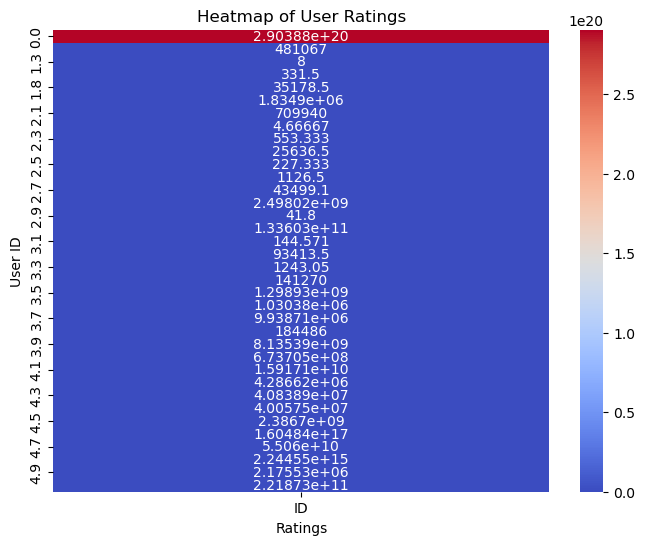

In [242]:
# 'pivot_table' function ka use karke hum 'ID' ko 'Rating' ke against pivot kar rahe hain.
# 'ID' ko rows mein rakh rahe hain aur 'Rating' ko columns mein.
heatmap_data = train_data.pivot_table('ID', 'Rating')

# Figure size set kar rahe hain
plt.figure(figsize=(8, 6))

# 'sns.heatmap' ka use karke heatmap plot kar rahe hain
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)

# Plot ke title aur labels set kar rahe hain
plt.title('Heatmap of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')

# Plot ko show kar rahe hain
plt.show()

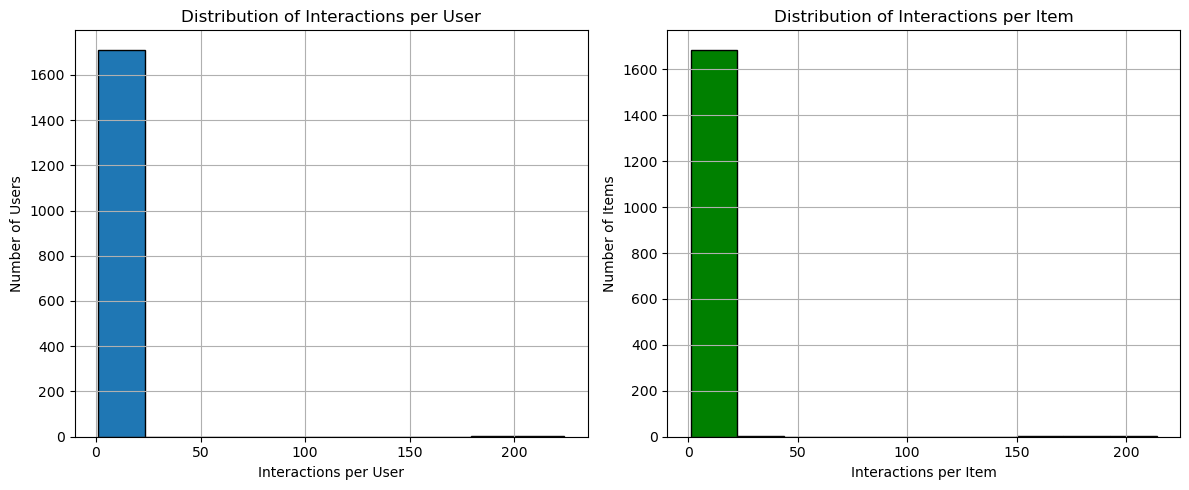

In [244]:
# Figure size set kar rahe hain taki plots clearly dikhai den
plt.figure(figsize=(12, 5))

# Pehla subplot: "Interactions per User" ka distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, aur pehla plot
# 'ID' column mein users ke interactions ka count kar rahe hain aur histogram bana rahe hain
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')  # 10 bins aur black color ka edge
plt.xlabel('Interactions per User')  # X-axis pe label: kitni baar kisi user ne interactions kiye
plt.ylabel('Number of Users')  # Y-axis pe label: Kitne users ne specific number of interactions kiye
plt.title('Distribution of Interactions per User')  # Pehle plot ka title

# Dusra subplot: "Interactions per Item" ka distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, aur doosra plot
# 'ProdID' column mein products ke interactions ka count kar rahe hain aur histogram bana rahe hain
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k', color='green')  # 10 bins, black edge aur green color
plt.xlabel('Interactions per Item')  # X-axis pe label: Kitni baar kisi product ko interactions mili hain
plt.ylabel('Number of Items')  # Y-axis pe label: Kitne items ko specific number of interactions mili hain
plt.title('Distribution of Interactions per Item')  # Doosre plot ka title

# Layout adjust kar rahe hain taki plots ek dusre se overlap na karein
plt.tight_layout()

# Plots ko display kar rahe hain
plt.show()

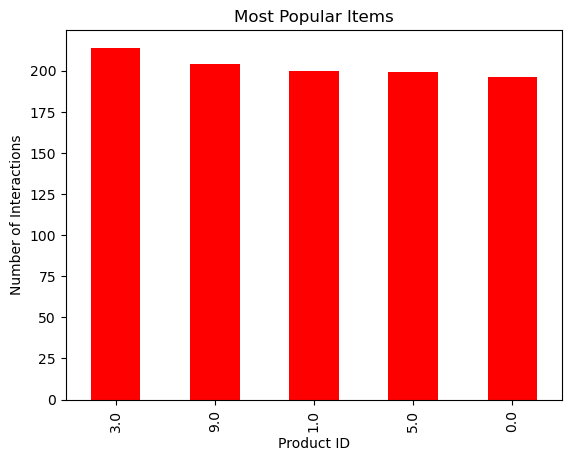

In [248]:
# 'ProdID' column mein products ke interactions ka count kar rahe hain aur top 5 popular items select kar rahe hain
popular_items = train_data['ProdID'].value_counts().head(5)

# Bar plot create kar rahe hain jisme red color use kiya gaya hai
popular_items.plot(kind='bar', color='red')

# Plot ka title set kar rahe hain
plt.title("Most Popular Items")

# X-axis label ko set kar rahe hain
plt.xlabel('Product ID')

# Y-axis label ko set kar rahe hain
plt.ylabel('Number of Interactions')

# Plot ko display kar rahe hain
plt.show()

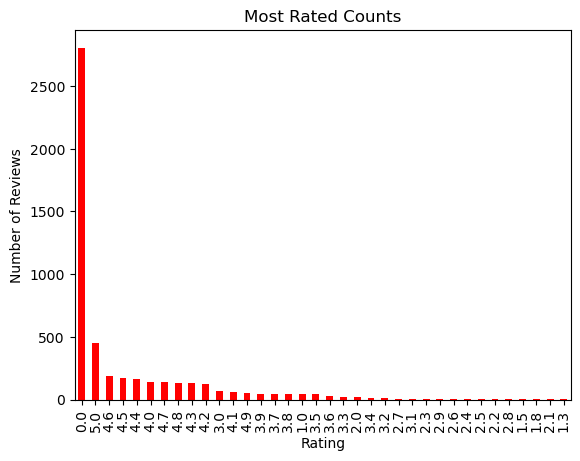

In [250]:
# 'Rating' column mein ratings ke frequency ko count kar rahe hain aur bar plot create kar rahe hain
train_data['Rating'].value_counts().plot(kind='bar', color='red')

# Plot ka title set kar rahe hain
plt.title("Most Rated Counts")

# X-axis label set kar rahe hain
plt.xlabel('Rating')

# Y-axis label set kar rahe hain
plt.ylabel('Number of Reviews')

# Plot ko display kar rahe hain
plt.show()

# Step 3: Data Cleaning and Tags Creations

In [257]:
# Sabse pehle, spacy aur stop_words ko import karte hain
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Spacy ka English model load kar rahe hain (jo pre-trained hai)
nlp = spacy.load("en_core_web_sm")

# Yeh function define kar rahe hain jo text ko clean karega aur usse tags extract karega
def clean_and_extract_tags(text):
    # Sabse pehle, text ko lowercase mein convert kar rahe hain, taaki case-sensitive issues na ho (jaise "Apple" aur "apple")
    doc = nlp(text.lower())
    
    # Ab hum un tokens ko select kar rahe hain jo alphanumeric hain aur stop words ke list mein nahi aate
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    
    # Jo bhi tags extract kiye hain unko comma-separate string mein join kar rahe hain
    return ', '.join(tags)

# Ab hum specify kar rahe hain kaunse columns se hum tags extract karna chahte hain
columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

# Ab for loop ke through, hum har ek column ko process karenge
for column in columns_to_extract_tags_from:
    # Har column par clean_and_extract_tags function apply karenge
    # Isse har text ko clean kiya jayega aur tags extract ho jayenge
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

In [261]:
# Yeh line un cleaned tags ko concatenate kar rahi hai jo humne 'Category', 'Brand', aur 'Description' columns se extract kiye hain.
train_data['Tags'] = train_data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

# Rating Base Recommendations System

In [264]:
# Hum 'Name', 'ReviewCount', 'Brand', aur 'ImageURL' ke basis par data ko group kar rahe hain aur har group ke liye average 'Rating' calculate kar rahe hain.
average_ratings = train_data.groupby(['Name', 'ReviewCount', 'Brand', 'ImageURL'])['Rating'].mean().reset_index()

In [266]:
# 'Rating' column ke basis par average_ratings DataFrame ko descending order mein sort kar rahe hain
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)

# Top 10 rated items ko select kar rahe hain
rating_base_recommendation = top_rated_items.head(10)

In [272]:
# 'Rating' column ko integer type mein convert kar rahe hain
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)

# 'ReviewCount' column ko integer type mein convert kar rahe hain
rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)

C:\Users\shaur\AppData\Local\Temp\ipykernel_14128\1823620794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
C:\Users\shaur\AppData\Local\Temp\ipykernel_14128\1823620794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)


In [274]:
# Print kar rahe hain ek message "Rating Base Recommendation System: (Trending Products)"
print("Rating Base Recommendation System: (Trending Products)")

# rating_base_recommendation DataFrame se kuch specific columns select kar rahe hain
rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]

# Display the final DataFrame with selected columns
rating_base_recommendation

Rating Base Recommendation System: (Trending Products)


C:\Users\shaur\AppData\Local\Temp\ipykernel_14128\4100267940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]


,Name,ReviewCount,Brand,ImageURL,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4,moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2,alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2,"gold, bond",https://i5.walmartimages.com/asr/34b610e7-05db...,5
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24,versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2,goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",1,"red, devil",https://i5.walmartimages.com/asr/60bfe5ba-774c...,5
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1,"air, wick",https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,4,"bain, de, terre",https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,12,"long, aid",https://i5.walmartimages.com/asr/f7f29199-bfa5...,5
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",1,diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5


# Content Base Recommendation system (User Preferences or Items similarities)

In [277]:
# TF-IDF Vectorizer ko import kar rahe hain, jo text data ko numerical representation mein convert karta hai
from sklearn.feature_extraction.text import TfidfVectorizer

# Cosine Similarity ko import kar rahe hain, jo two vectors ke beech similarity ko calculate karta hai
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF Vectorizer ka object create kar rahe hain
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# 'Tags' column se text data ko TF-IDF matrix mein convert kar rahe hain
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

# Cosine Similarity calculate kar rahe hain, jo products ke beech similarity ko measure karega
cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

In [279]:
# Specified item ka naam dena hai
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
# train_data DataFrame se wo row select kar rahe hain jahan 'Name' column ka value 'item_name' ke equal hai
# Aur us row ka index retrieve kar rahe hain
item_index = train_data[train_data['Name'] == item_name].index[0]

In [281]:
# cosine_similarities_content matrix se 'item_index' row ke liye similarity values nikaal rahe hain
# enumerate() function ka use kar rahe hain taaki har similarity value ke saath product ka index mile
similar_items = list(enumerate(cosine_similarities_content[item_index]))

In [283]:
# Similar items ko sort kar rahe hain based on similarity values (cosine similarity)
# x[1] har tuple mein similarity value ko represent karta hai
similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

# Top 9 similar items ko select kar rahe hain, excluding the first item (jo apna original item hai)
top_similar_items = similar_items[1:10]

# Top 9 similar items ke indices ko extract kar rahe hain
recommended_items_indics = [x[0] for x in top_similar_items]

In [285]:
# 'recommended_items_indics' list ke basis par hum 'train_data' ke wo rows select kar rahe hain 
# jo recommended products ko represent karte hain. Yeh indexing 'iloc' ke through hoti hai.
train_data.iloc[recommended_items_indics][['Name','ReviewCount','Brand']]

,Name,ReviewCount,Brand
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi


# Function To Recommend Products for Content Base

In [288]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Content-based recommendation system function
def content_based_recommendations(train_data, item_name, top_n=10):
    
    # Step 1: Yeh check kar rahe hain ki user jo item input de raha hai, kya woh train_data mein hai ya nahi
    if item_name not in train_data['Name'].values:
        # Agar item nahi milta toh ek message print karenge aur empty dataframe return karenge
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()  # Agar item data mein nahi hai toh empty dataframe return karo

    # Step 2: TF-IDF vectorizer bana rahe hain, jo item ke tags ko numerical form mein convert karega
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # 'english' stop words ignore karne ke liye, jaise 'is', 'the', etc.
    
    # Step 3: Tags ko TF-IDF vectorization apply karte hain
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
    
    # Step 4: Ab hum cosine similarity calculate kar rahe hain, jo ek measure hai ki kitna similar hai ek item doosre se unke tags ke base par
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)
    
    # Step 5: Selected item ka index find kar rahe hain, jisse hum us item ke similarity scores nikal sakein
    item_index = train_data[train_data['Name'] == item_name].index[0]
    
    # Step 6: Ab hum selected item ke liye similarity scores nikaal rahe hain
    similar_items = list(enumerate(cosine_similarities_content[item_index]))
    
    # Step 7: Similar items ko descending order mein sort kar rahe hain
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)
    
    # Step 8: Top N similar items ko select kar rahe hain, jisme apna item include nahi hoga
    top_similar_items = similar_items[1:top_n+1]
    
    # Step 9: Ab hum top similar items ke indices nikal rahe hain
    recommended_item_indices = [x[0] for x in top_similar_items]
    
    # Step 10: Hum recommended items ke details nikaal rahe hain jaise 'Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating'
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]
    
    # Step 11: Final output return kar rahe hain jisme recommended items ke details hain
    return recommended_items_details

In [290]:
# Example: Get content-based recommendations for a specific item

# Step 1: Yahan hum item ka naam define kar rahe hain, jiske liye hume content-based recommendations chahiye.
# Hum 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath' item ko recommend karne ke liye use kar rahe hain.
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'

# Step 2: Ab hum 'content_based_recommendations' function ko call kar rahe hain.
# Is function mein 3 arguments diye ja rahe hain:
# - train_data: Ye wo data hai jisme items aur unke features stored hote hain, jisse similar items find kiye jaate hain.
# - item_name: Ye wo item hai jiske liye recommendations chahiye. Humne isme 'OPI Infinite Shine...' diya hai.
# - top_n=8: Yahan hum specify kar rahe hain ki hume top 8 similar items chahiye.

# Function ka kaam hota hai given item ke features ke basis pe similar items ko find karna, jaise ki us item ki category, brand, color etc. 
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

# Step 3: 'content_based_rec' variable mein ab wo top 8 recommendations stored hain jo 'item_name' ke similar hain.
# Yeh recommendations ek list ya DataFrame ho sakti hai, jisme un similar items ki details hogi.

# Step 4: Ab hum 'content_based_rec' ko print karenge taaki hume recommendations dikh sakein.
content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0


In [292]:
# Example: Get content-based recommendations for a specific item

# Step 1: Yahan hum wo item define kar rahe hain, jiske liye hume content-based recommendations chahiye.
# Humne 'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz' item ko specify kiya hai jiske similar items hume find karne hain.
item_name = 'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz'

# Step 2: 'content_based_recommendations' function ko call kar rahe hain jo content-based filtering ke zariye recommendations deta hai.
# Is function mein 3 arguments diye ja rahe hain:
# - train_data: Ye wo dataset hai jisme products aur unke features stored hain, jo similar items ko dhoondhne ke liye use hote hain.
# - item_name: Ye wo item hai jiske liye similar items chahiye. Humne yahan 'Kokie Professional Matte Lipstick, Hot Berry' diya hai.
# - top_n=8: Hum specify kar rahe hain ki hume top 8 recommendations chahiye.

# Yeh function us item ke features ko use karke content-based filtering apply karega aur wo items return karega jo is item ke features se similar hain.
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

# Step 3: Ab, 'content_based_rec' mein wo 8 items stored hain jo 'Kokie Professional Matte Lipstick' ke similar hain.
# Yeh ek list ya DataFrame ho sakti hai, jisme un similar items ki details hogi.

# Step 4: Ab hum content-based recommendations ko print karenge taaki hume wo items dikh sakein.
content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
546,"Kokie Professional Matte Lipstick, Kiss Me, 0....",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/27dd82a2-2b9c...,0.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
4084,e.l.f. Mad for Matte 4 Piece Lip Color Set,0.0,cosmetics,https://i5.walmartimages.com/asr/e2d30304-edc9...,0.0
1559,"LOreal Paris Colour Riche Matte Lip Liner, Mat...",495.0,paris,https://i5.walmartimages.com/asr/baf97085-7231...,4.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
3023,Be Matte Lipstick - Pink,2.0,"city, color",https://i5.walmartimages.com/asr/4425a13e-085f...,3.0


# Collaborative Filtering (User Item Similarity)

In [295]:
# Yahan hum ek hi line mein pivot_table ka use kar rahe hain taaki ek user-item matrix banayein,
# jisme users (ID) ke against products (ProdID) ki ratings (Rating) hongi. Agar kisi user ne kisi product ko rate nahi kiya,
# toh us cell ko 0 se fill karenge (fillna(0)), aur fir matrix ko integer type mein convert karenge (astype(int)).

user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0).astype(int)

In [297]:
# Yahan, hum `cosine_similarity` function ka use kar rahe hain taaki hum user-item matrix ke beech similarity calculate kar sakein.
# Iska matlab hai ki hum users ke beech similarity find kar rahe hain based on unke ratings for different products.
# `user_item_matrix` ek matrix hai jisme rows users (ID) hain aur columns products (ProdID) hain. Har cell mein user ki rating hogi us product ke liye.

user_similarity = cosine_similarity(user_item_matrix)

In [299]:
# Yahan hum `target_user_id` ko specify kar rahe hain, jo ki wo user hai jiske liye hum similarity ya recommendations chahte hain.
# Fir hum `get_loc` method ka use karte hain taaki us user ka index retrieve kar sakein from the `user_item_matrix`.

target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [301]:
# 1. Sabse pehle, hum target user ke liye user similarities ko extract kar rahe hain.
# 2. Fir hum `argsort` function ka use karte hain jo similarity values ko sort karega, 
#    aur `[::-1]` se unhe descending order mein arrange karega, taaki sabse zyada similar users pehle aaye.
# 3. `[1:]` ka use kar rahe hain taaki target user ko apne similar users ke list mein exclude kar sakein.

user_similarities = user_similarity[target_user_index]
similar_user_indices = user_similarities.argsort()[::-1][1:]

In [303]:
# Yahan hum target user ke liye recommend kiye jaane wale products ko identify kar rahe hain,
# jisme un products ko target user ne rate nahi kiya, par similar users ne rate kiya hai.
# Fir un products ki details ko `train_data` se retrieve kar rahe hain.

recommend_items = []  # Recommend hone wale items ki list ko initialize karte hain.

# Similar users ke indices par loop chala rahe hain
for user_index in similar_user_indices:
    # `rated_by_similar_user`: Similar user ki ratings ko extract kar rahe hain
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    
    # `not_rated_by_target_user`: Wo products jo target user ne rate nahi kiye, par similar user ne rate kiya hai
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)
    
    # `recommend_items`: Un products ko add kar rahe hain jo target user ne rate nahi kiye,
    # lekin similar users ne rate kiya hai (Top 10 products).
    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

# `recommended_items_details`: Un recommended products ki details ko `train_data` se fetch kar rahe hain
# Jisme 'ProdID' recommend_items mein ho, aur hum un products ki details (Name, ReviewCount, Brand, ImageURL, Rating) dikhayenge.
recommended_items_details = train_data[train_data['ProdID'].isin(recommend_items)][['Name','ReviewCount','Brand','ImageURL','Rating']]

In [305]:
# Is line mein hum `recommended_items_details` DataFrame ke pehle 10 rows ko dekh rahe hain.
# `.head(10)` function ka use hota hai top 10 records ko fetch karne ke liye.

recommended_items_details.head(10)

,Name,ReviewCount,Brand,ImageURL,Rating
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
33,"DenTek Kids Fun Flossers, Removes Food & Plaqu...",3.0,dentek,https://i5.walmartimages.com/asr/de6e52eb-6e18...,0.0
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
64,Neutrogena SkinClearing Oil-Free Liquid Founda...,741.0,neutrogena,https://i5.walmartimages.com/asr/fd4d78d8-310a...,4.2
69,Design Essentials Natural Coconut & Monoi Curl...,1.0,"design, essentials",https://i5.walmartimages.com/asr/ff2dba1d-0c02...,5.0
78,"Paul Sebastian Fine Cologne Spray, Cologne for...",28.0,"paul, sebastian",https://i5.walmartimages.com/asr/03d08a07-18d7...,4.8
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
92,"Bytewise Organic Moringa Leaf Powder, 12 Oz",0.0,bytewise,https://i5.walmartimages.com/asr/076f2b3f-fdc3...,0.0
94,Ag Hair Cosmetics Ultradynamics Extra-Firm Fin...,0.0,"ag, hair",https://i5.walmartimages.com/asr/5d217d98-a385...,0.0
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0


# Function That Recommend Items

In [308]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended items
    recommended_items_details = train_data[train_data['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details.head(10)

# Example usage
target_user_id = 4
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 4:


,Name,ReviewCount,Brand,ImageURL,Rating
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
86,LOreal Paris Feria Multi-Faceted Shimmering Pe...,2144.0,paris,https://i5.walmartimages.com/asr/c229026a-2b75...,3.1
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
144,Covidien Curity Maternity Pad Heavy 4.33&quot ...,0.0,covidien,https://i5.walmartimages.com/asr/e4e38217-ed43...,0.0
155,"Crest 3D White Brilliance Mouthwash, Alcohol F...",63.0,crest,https://i5.walmartimages.com/asr/1fcc5525-9ae3...,0.0
174,COVERGIRL Outlast All-Day Moisturizing Lip Col...,36.0,covergirl,https://i5.walmartimages.com/asr/4479896f-c6c4...,0.0
193,"Revlon ColorStay Skinny Liquid Liner, 304 Gree...",70.0,revlon,https://i5.walmartimages.com/asr/aa3b20a6-3d6d...,4.5
212,"Comvita Certified UMF 20+ Manuka Honey, Raw & ...",0.0,comvita,https://i5.walmartimages.com/asr/3cdc1498-a2ac...,0.0
241,"Ahava Mens Mineral Hand Cream, 3.4 Oz",0.0,ahava,https://i5.walmartimages.com/asr/f74e4bb7-47d3...,0.0


# Hybrid Recommendations

In [311]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data, target_user_id, item_name, top_n=10):
    # Content-based recommendations nikaalna
    # content_based_recommendations function ko call karke content-based recommendations liye ja rahe hain
    content_based_rec = content_based_recommendations(train_data, item_name, top_n)

    # Collaborative filtering recommendations nikaalna
    # collaborative_filtering_recommendations function ko call karke target user ke liye collaborative filtering recommendations liye ja rahe hain
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id, top_n)
    
    # Content-based aur collaborative filtering recommendations ko merge karna aur duplicates hataana
    # pd.concat() ka use karke dono recommendation lists ko merge kiya ja raha hai
    # drop_duplicates() function se duplicate items ko remove kiya ja raha hai taaki final list mein har product sirf ek baar aaye
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()
    
    # Top 10 recommendations return karna
    # head(10) ka use karke sirf top 10 recommended items ko return kiya ja raha hai
    return hybrid_rec.head(10)

In [313]:
# Example usage: Get hybrid recommendations for a specific user and item

# User ka ID specify kar rahe hain jiske liye recommendations chahiye
target_user_id = 4  # Yahan pe 4 diya gaya hai, aap kisi bhi user ka ID de sakte hain

# Item ka naam specify kar rahe hain jiske liye hybrid recommendations chahiye
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11"  # Item ka naam dena hai jiske liye recommendation chahiye

# hybrid_recommendations function ko call kar rahe hain, isme train_data, target_user_id, item_name aur top_n pass kiye ja rahe hain
# Jisme top_n=10 ka matlab hai ki hum 10 top recommendations chahte hain
hybrid_rec = hybrid_recommendations(train_data, target_user_id, item_name, top_n=10)

# Final output print kar rahe hain, jo ki target user aur item ke liye hybrid recommendations dikhayega
print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec  # Yeh line hybrid recommendations ko print karegi

Top 10 Hybrid Recommendations for User 4 and Item 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11':


,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi,https://i5.walmartimages.com/asr/98b4194c-e026...,0.0
1042,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,0.0


In [315]:
# Example usage: Get hybrid recommendations for a specific user and item

# Target user ka ID specify kar rahe hain (Yahan pe user_id 10 diya gaya hai)
target_user_id = 10  # Change this to the user_id you want recommendations for

# Specific item ka naam specify kar rahe hain jiske liye hybrid recommendations chahiye
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'  # Change this to the item name

# hybrid_recommendations function ko call kar rahe hain, isme train_data, target_user_id, item_name aur top_n pass kiye ja rahe hain
# Top 10 hybrid recommendations ko fetch kar rahe hain
hybrid_rec = hybrid_recommendations(train_data, target_user_id, item_name, top_n=10)

# Final output ko print kar rahe hain, jo ki target user aur item ke liye hybrid recommendations dikhayega
print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec  # Yeh line hybrid recommendations ko print karegi

Top 10 Hybrid Recommendations for User 10 and Item 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum':


,Name,ReviewCount,Brand,ImageURL,Rating
896,"Black Radiance Perfect Tone Lip Color, Vintage...",78.0,"black, radiance",https://i5.walmartimages.com/asr/485f26b4-a19a...,4.7
2496,"Black Radiance Perfect Tone Lip Color, Hollywo...",18.0,"black, radiance",https://i5.walmartimages.com/asr/fe3da48f-5142...,4.3
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/25b4b467-bc61...,0.0
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
4872,"L.A. Colors Matte Lipstick, Torrid Matte",8.0,colors,https://i5.walmartimages.com/asr/62d6d9fa-eee1...,4.8
1300,"e.l.f. Liquid Matte Lipstick, Tea Rose",476.0,cosmetics,https://i5.walmartimages.com/asr/58220de4-3875...,4.1
420,Black Opal Color Splurge Sassy Luxe Matte Lips...,0.0,"black, opal",https://i5.walmartimages.com/asr/a991241b-e4ad...,0.0


In [317]:
print(train_data.columns)  # Yeh dekhne ke liye ki columns ka exact naam kya hai

Index(['ID', 'ProdID', 'Rating', 'ReviewCount', 'Category', 'Brand', 'Name',
       'ImageURL', 'Description', 'Tags'],
      dtype='object')


In [319]:
train_data

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"premium, beauty, premium, makeup, premium, nai..."
1,9.500000e+01,76.0,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,8.000000e+00,8.0,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,4.000000e+00,3.0,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,9.900000e+02,3.0,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."
...,...,...,...,...,...,...,...,...,...,...
4995,2.771000e+03,208.0,4.5,2.0,"household, essentials, air, fresheners, spray,...","eclectic, lady","Garden Mint Room Spray (Double Strength), 4 ou...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"garden, mint, lovely, blend, spearmint, lettuc...","household, essentials, air, fresheners, spray,..."
4996,0.000000e+00,1.0,3.9,7484.0,"beauty, hair, care, hair, color, permanent, ha...",garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,https://i5.walmartimages.com/asr/24d7a837-51f8...,"garnier, nutrisse, nourishing, hair, color, cr...","beauty, hair, care, hair, color, permanent, ha..."
4997,3.400000e+01,96.0,0.0,4.0,"beauty, makeup, nails",stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",https://i5.walmartimages.com/asr/d6202179-2c93...,"multifunctional, nail, drill, kit, come, 6, di...","beauty, makeup, nails, stoneway, multifunction..."
4998,9.000000e+00,7.0,0.0,0.0,"premium, beauty, premium, bath, body, premium,...",creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,https://i5.walmartimages.com/asr/3dc99239-66d2...,,"premium, beauty, premium, bath, body, premium,..."


In [321]:
# train_data ko CSV file ke roop mein save karna
train_data.to_csv('train_data.csv', index=False)